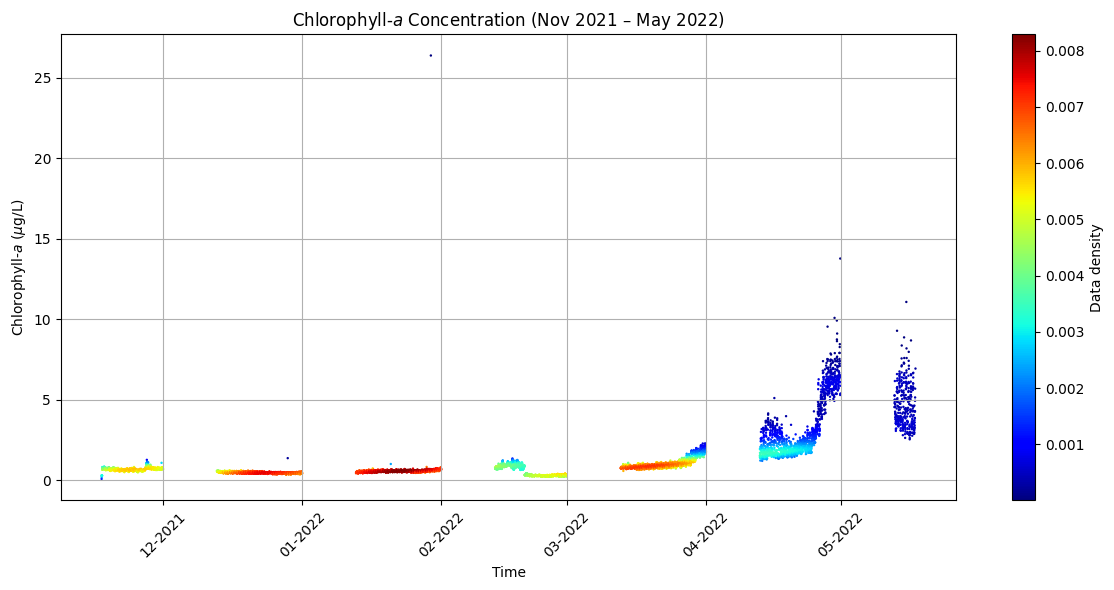

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.dates as mdates

# Load csv
df = pd.read_csv("IN_SITU.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime', 'chlorophyll'])

# Filter time range
df = df[(df['datetime'] >= '2021-11-01') & (df['datetime'] <= '2022-05-31')]

# Convert to numeric for KDE
x = mdates.date2num(df['datetime'])
y = df['chlorophyll']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)  # global density

# PLot
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
sc = ax.scatter(df['datetime'], y, c=z, s=3, cmap='jet', edgecolor='none')
ax.set_title(r"Chlorophyll-$\it{a}$ Concentration (Nov 2021 – May 2022)")
ax.set_xlabel("Time")
ax.set_ylabel(r"Chlorophyll-$\it{a}$ ($\mu$g/L)")
ax.grid(True)

# Format x-axis month year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Fix colorbar (scatter)
cbar = plt.colorbar(sc, ax=ax, label='Data density')

plt.tight_layout()
plt.savefig("chlorophyll_timeseries.png", dpi=300, bbox_inches='tight')
plt.show()

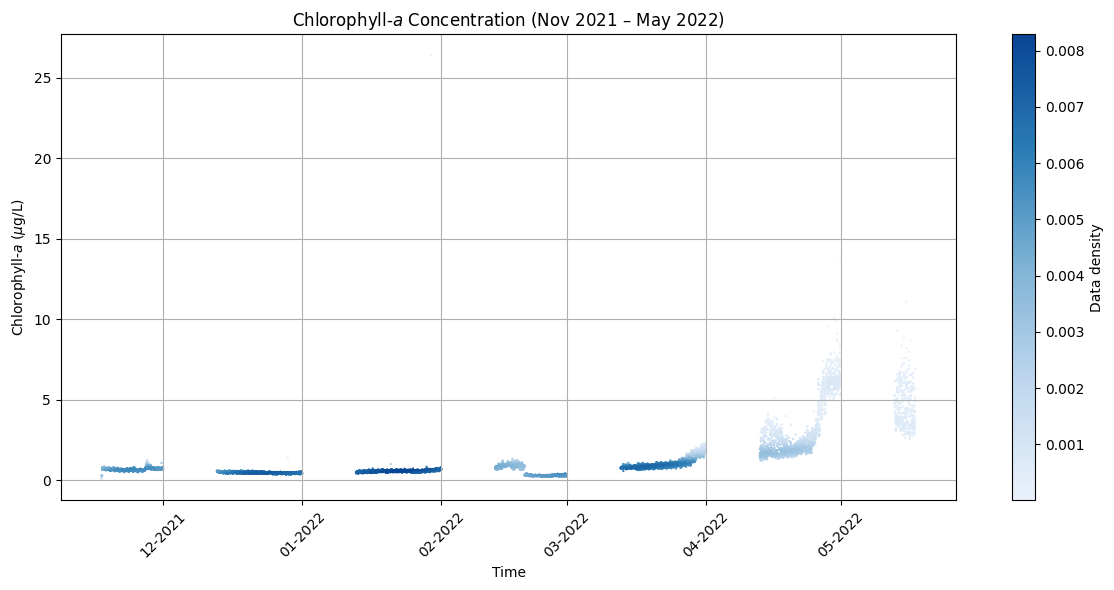

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

# Load and clean data
df = pd.read_csv("IN_SITU.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime', 'chlorophyll'])

# Filter time range
df = df[(df['datetime'] >= '2021-11-01') & (df['datetime'] <= '2022-05-31')]

# Convert to numeric for KDE
x = mdates.date2num(df['datetime'])
y = df['chlorophyll']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)  

dense_blues = mcolors.LinearSegmentedColormap.from_list(
    "dense_blues",
    ["#eaf2fb", "#bfd7ee", "#7fb3d5", "#2b7db6", "#084594"]  
)
# Plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

sc = ax.scatter(df["datetime"], y, c=z, cmap=dense_blues, s=3, linewidths=0)

ax.set_title(r"Chlorophyll-$\it{a}$ Concentration (Nov 2021 – May 2022)")
ax.set_xlabel("Time")
ax.set_ylabel(r"Chlorophyll-$\it{a}$ ($\mu$g/L)")
ax.grid(True)

# Format x-axis to month year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Fix colourbar 
cbar = plt.colorbar(sc, ax=ax, label='Data density')

plt.tight_layout()
plt.savefig("chlorophyll_timeseries_blue_dense.png", dpi=300, bbox_inches="tight")
plt.show()

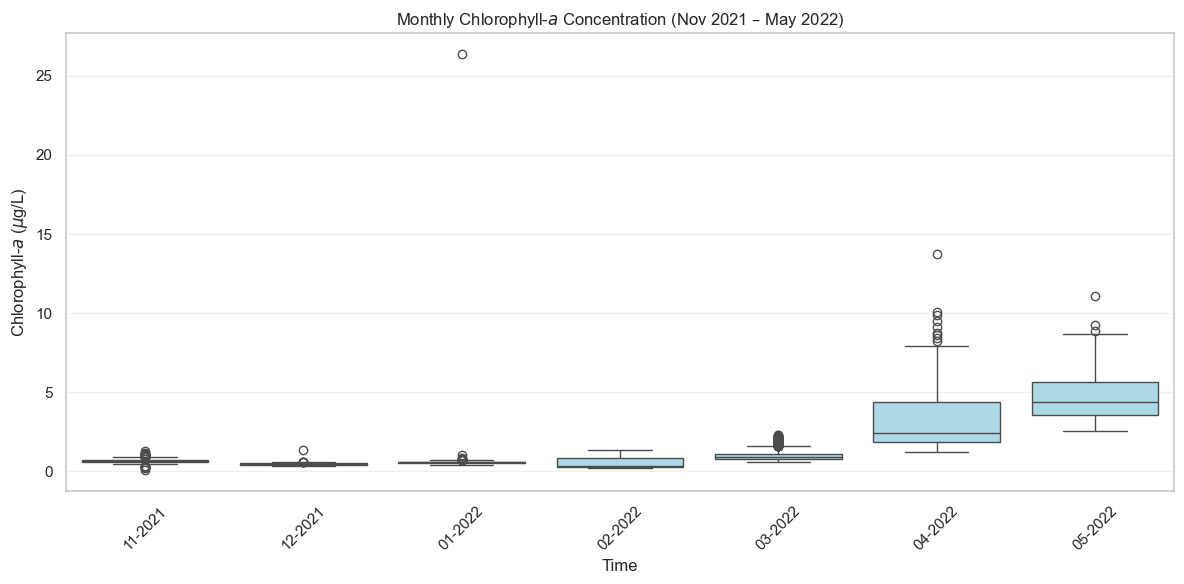

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("IN_SITU.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime', 'chlorophyll'])

# Time window
df = df[(df['datetime'] >= '2021-11-01') & (df['datetime'] <= '2022-05-31')]

# Make months and labels in order
df['month_period'] = df['datetime'].dt.to_period('M')
df['month_year'] = df['month_period'].dt.strftime('%m-%Y')

# Create an ordered categorical so seaborn respects chronological order
order = (
    df[['month_period', 'month_year']]
    .drop_duplicates()
    .sort_values('month_period')
    ['month_year']
    .tolist()
)
df['month_year'] = pd.Categorical(df['month_year'], categories=order, ordered=True)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6), dpi=100)

sns.boxplot(
    x='month_year',
    y='chlorophyll',
    data=df,
    boxprops=dict(facecolor='lightblue')
)

plt.title(r"Monthly Chlorophyll-$\it{a}$ Concentration (Nov 2021 – May 2022)")
plt.xlabel("Time")
plt.ylabel(r"Chlorophyll-$\it{a}$ ($\mu$g/L)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("chlorophyll_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

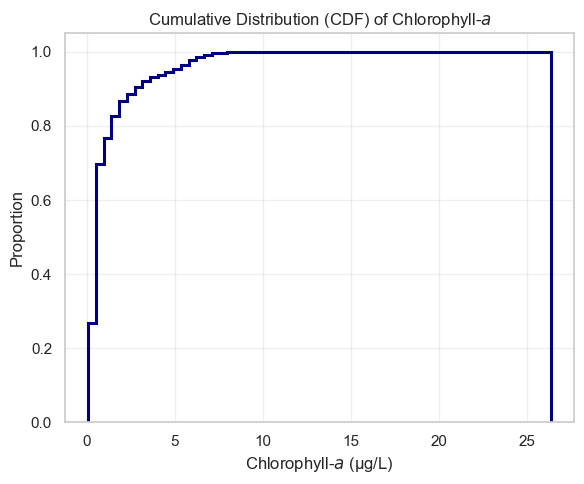

In [4]:
x = df["chlorophyll"].dropna().to_numpy()
x = x[x >= 0]

plt.figure(figsize=(6,5))  
plt.hist(x, bins=60, cumulative=True, density=True,
    histtype="step", color="navy", linewidth=2.2)


plt.xlabel(r"Chlorophyll-$\it{a}$ (µg/L)")
plt.ylabel("Proportion")
plt.title(r"Cumulative Distribution (CDF) of Chlorophyll-$\it{a}$")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("chlorophyll_CDF.png", dpi=300, bbox_inches='tight')
plt.show()

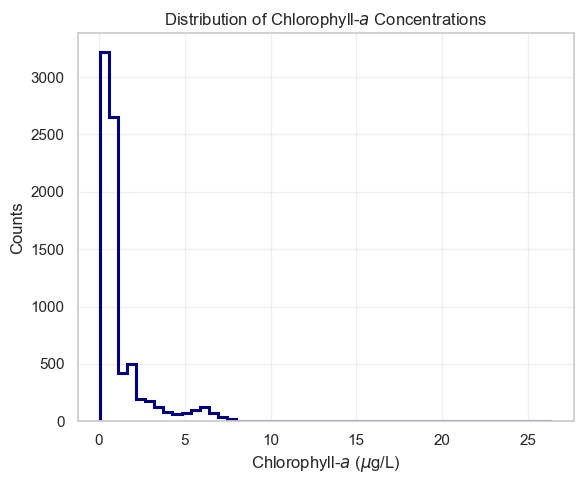

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("IN_SITU.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime', 'chlorophyll'])

# Filter same time range as scatter
df = df[(df['datetime'] >= '2021-11-01') & (df['datetime'] <= '2022-05-31')]

# Plot 
plt.figure(figsize=(6, 5), dpi=100)
plt.hist(
    df['chlorophyll'],
    bins=50,
    histtype='step',
    color='navy',
    linewidth=2.2  
)

plt.title(r"Distribution of Chlorophyll-$\it{a}$ Concentrations")
plt.xlabel(r"Chlorophyll-$\it{a}$ ($\mu$g/L)")
plt.ylabel("Counts")

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("chlorophyll_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

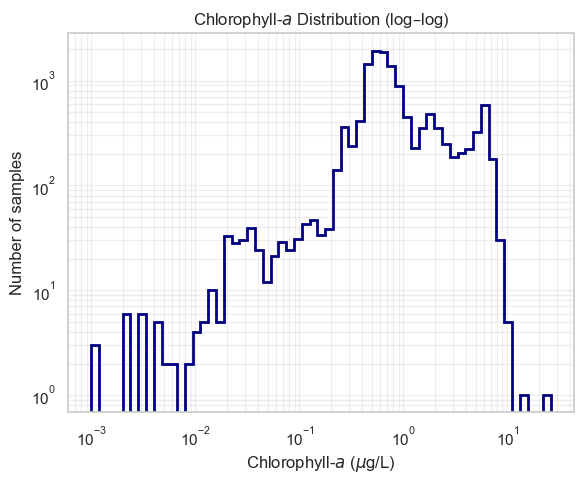

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("IN_SITU.csv")
x = pd.to_numeric(df["chlorophyll"], errors="coerce").dropna().to_numpy()
x = x[x > 0]  # log scale requires strictly positive values

# Log-spaced bins
nbins = 60
bins = np.logspace(np.log10(x.min()), np.log10(x.max()), nbins)

# Plot
plt.figure(figsize=(6, 5), dpi=100)  
plt.hist(
    x, bins=bins,
    histtype="step",
    color="navy",
    linewidth=2.0
)

# Log–log axes
plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"Chlorophyll-$\it{a}$ ($\mu$g/L)")
plt.ylabel("Number of samples")
plt.title(r"Chlorophyll-$\it{a}$ Distribution (log–log)")

plt.grid(True, which="both", alpha=0.3)

plt.tight_layout()
plt.savefig("chlorophyll_loglog_hist.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
import pandas as pd

# Load and clean data
df = pd.read_csv("IN_SITU.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime', 'chlorophyll'])

# Mask Nov 2021 – May 2022
mask = (df['datetime'] >= '2021-11-01') & (df['datetime'] <= '2022-05-31')
s = pd.to_numeric(df.loc[mask, 'chlorophyll'], errors='coerce').dropna()
s = s[s >= 0]

# percentiles
q = s.quantile([0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).rename({
    0.10:'p10', 0.25:'q1', 0.50:'median', 0.75:'q3', 0.90:'p90', 0.95:'p95'
})
iqr = q['q3'] - q['q1']

print(f"Median: {q['median']:.2f} µg/L")
print(f"90th percentile: {q['p90']:.2f} µg/L")
print(f"95th percentile: {q['p95']:.2f} µg/L")
print(f"IQR (Q3−Q1): {iqr:.2f} µg/L")

# median, p90, p95
df_sub = df.loc[mask & (df['chlorophyll'] >= 0)].copy()
df_sub['month'] = df_sub['datetime'].dt.to_period('M')

monthly = (
    df_sub.groupby('month')['chlorophyll']
          .quantile([0.5, 0.9, 0.95])
          .unstack()
          .rename(columns={0.5:'median', 0.9:'p90', 0.95:'p95'})
)
# month labels
monthly.index = monthly.index.strftime('%m-%Y')
print(monthly.round(2))


Median: 0.68 µg/L
90th percentile: 3.01 µg/L
95th percentile: 5.16 µg/L
IQR (Q3−Q1): 0.66 µg/L
         median   p90   p95
month                      
11-2021    0.67  0.77  0.82
12-2021    0.47  0.54  0.55
01-2022    0.56  0.65  0.67
02-2022    0.34  0.99  1.06
03-2022    0.91  1.63  1.80
04-2022    2.42  6.25  6.74
05-2022    4.39  6.49  6.97
